<a href="https://colab.research.google.com/github/anniemajella/jenkins/blob/main/CNN_cifar_10_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

import warnings
warnings.filterwarnings('ignore')

In [ ]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


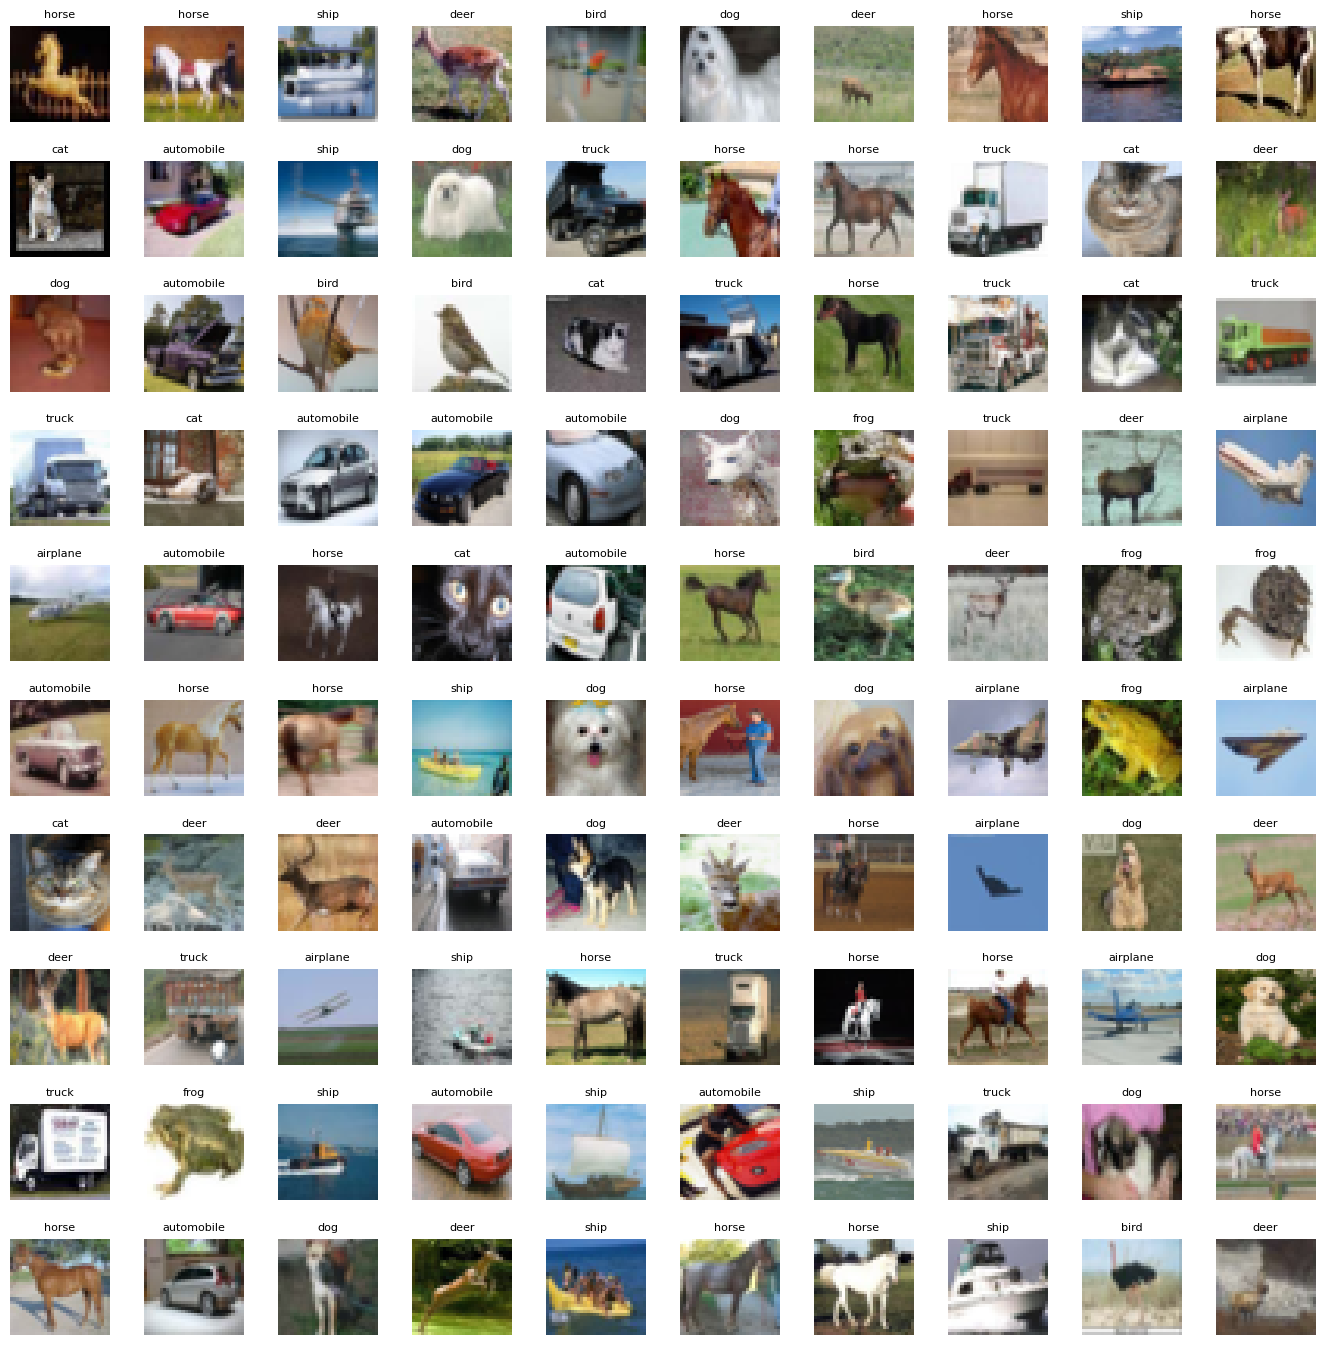

In [ ]:
# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck']
fig, axes = plt.subplots(10,10, figsize = (17,17))
axes = axes.ravel()
n_train = len(x_train)

for i in np.arange(0, 100):
  index = np.random.randint(0,n_train)

  axes[i].imshow(x_train[index,1:])
  label_index = int(y_train[index])
  axes[i].set_title(labels[label_index], fontsize = 8)
  axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

label: truck


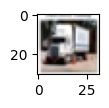

In [ ]:
#import pylab as pylt
print('label:',labels[int(y_train[666])])
plt.figure(figsize=(.8,1))
plt.imshow(x_train[666,1:])
plt.show()

Text(0.5, 1.0, 'Class distribution in training set')

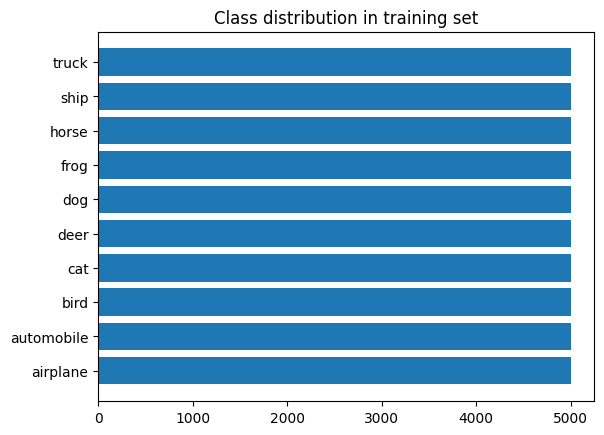

In [ ]:
classes, counts = np.unique(y_train, return_counts=True)
plt.barh(labels, counts)
plt.title('Class distribution in training set')

Text(0.5, 1.0, 'Class distribution in testing set')

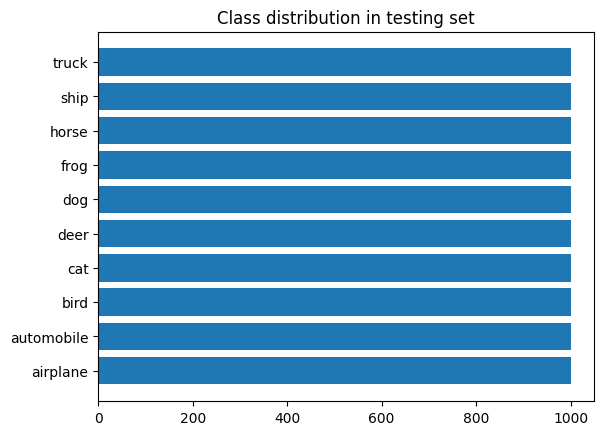

In [ ]:
classes, counts = np.unique(y_test, return_counts=True)
plt.barh(labels, counts)
plt.title('Class distribution in testing set')

In [ ]:
#normalize values 0 to 1 range
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
num_classes = 10

In [ ]:
#model creation

model = Sequential()
model.add(Conv2D(8,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(filters=16, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 8)         224       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        1168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 16)        0         
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 32)                100384    
                                                        

In [ ]:
#model compilation

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=100,epochs=50,verbose=1,validation_data=(x_test,y_test))

Epoch 1/50
500/500 [==============================] - 15s 8ms/step - loss: 2.0373 - accuracy: 0.2263 - val_loss: 1.6902 - val_accuracy: 0.4333
Epoch 2/50
500/500 [==============================] - 4s 8ms/step - loss: 1.8141 - accuracy: 0.3145 - val_loss: 1.5393 - val_accuracy: 0.4688
Epoch 3/50
500/500 [==============================] - 3s 7ms/step - loss: 1.7368 - accuracy: 0.3428 - val_loss: 1.4888 - val_accuracy: 0.4972
Epoch 4/50
500/500 [==============================] - 3s 6ms/step - loss: 1.6800 - accuracy: 0.3687 - val_loss: 1.4401 - val_accuracy: 0.5129
Epoch 5/50
500/500 [==============================] - 4s 8ms/step - loss: 1.6422 - accuracy: 0.3791 - val_loss: 1.4126 - val_accuracy: 0.5137
Epoch 6/50
500/500 [==============================] - 4s 8ms/step - loss: 1.6201 - accuracy: 0.3905 - val_loss: 1.3858 - val_accuracy: 0.5255
Epoch 7/50
500/500 [==============================] - 3s 7ms/step - loss: 1.5926 - accuracy: 0.4063 - val_loss: 1.3173 - val_accuracy: 0.5567
Epoch

In [ ]:
#model evaluation

score = model.evaluate(x_test,y_test,verbose=0)
print('Test Loss: ',score[0])
print('Test Accuracy: ', score[1])

Test Loss:  1.0572092533111572
Test Accuracy:  0.6359000205993652


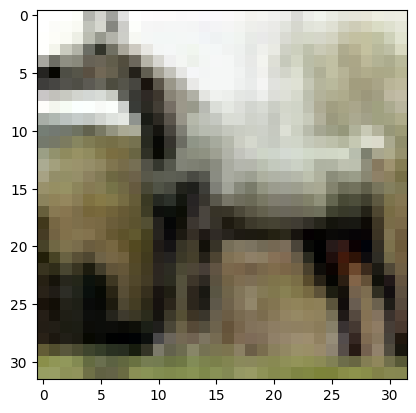

In [ ]:
plt.imshow(x_test[856])

In [ ]:
prediction = model.predict(x_test[856].reshape(1,32,32,3))
print('Prediction score: \n', prediction[0])
thresholded = (prediction>0.5)*1
print('\n Thresholded score: \n',thresholded[0])
im_index = np.where(thresholded==1)
print('Predicted image: \n', labels[im_index[1][0]])

1/1 [==============================] - 0s 19ms/step
Prediction score: 
 [1.2467815e-04 1.6997526e-06 5.1321262e-03 2.9940824e-03 2.6500864e-02
 4.9780072e-03 7.2802973e-06 9.6022123e-01 3.5269505e-08 3.9914910e-05]

 Thresholded score: 
 [0 0 0 0 0 0 0 1 0 0]
Predicted image: 
 horse


In [ ]:
print(thresholded)
print(im_index)

[[0 0 0 0 0 0 0 1 0 0]]
(array([0]), array([7]))


In [ ]:
threshold=[]
for i in prediction[0]:
  if i==max(prediction[0]):
    threshold.append(1)
  else:
    threshold.append(0)
thresholded=threshold
thresholded=np.array(thresholded)
print('\n Thresholded score: \n',thresholded)
im_index = np.where(thresholded==1)
print('Predicted image: \n', labels[im_index[0][0]])


 Thresholded score: 
 [0 0 0 0 0 0 0 1 0 0]
Predicted image: 
 horse


In [ ]:
print(thresholded)
print(im_index)

[0 0 0 0 0 0 0 1 0 0]
(array([7]),)
